# EDA on Forest fires

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Algerian_forest_fires_dataset_UPDATE3.csv to Algerian_forest_fires_dataset_UPDATE3.csv


In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE3.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       245 non-null    object 
dtypes: float64(11), object(4)
memory usage: 28.8+ KB


Make column region value as numericals

In [7]:
df.loc[:122, 'Region'] = 1
df.loc[122:, 'Region'] = 2

df['Region'] = df['Region'].astype(int)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
240,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
243,30.0,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [10]:
df.isnull().sum()

,0
day,1
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [11]:
df.shape

(245, 15)

In [12]:
# Remove null or NA value rows.
df = df.dropna().reset_index(drop = True)

In [13]:
df.shape

(243, 15)

Fixing column names, removing spaces

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
type(df['day'][0])

numpy.float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 28.6+ KB


Convert the below columns to 'int' data type

In [18]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

Convert the remaining columns except Classes (O/P) into float type:

In [19]:
object_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
object_features

['DC', 'FWI', 'Classes']

In [20]:
for i in object_features:
  if i != 'Classes':
    df[i] = df[i].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


# Cleaning data in target variable

In [23]:
# Target variable  = 'Classes'

df.Classes.value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [24]:
# Looks like values are misplaced because there are just 2 categories, i.e. 'fire' and 'not fire'.

df['Classes'] = df['Classes'].str.strip()

In [25]:
df['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


# Bejaia Region

In [26]:
df[:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,1
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2


In [27]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


# Sidi-Bel Abbes Region

In [28]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [29]:
# Now as we have cleaned data, we can update the csv file with this clean dataset.

df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index= False)

# EDA

In [30]:
# Dropping year features

df1 = df.drop(['day', 'month', 'year'], axis= 1)

In [31]:
# Encoding 'not fire' as 0 and 'fire' as 1
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [32]:
df1.Classes = np.where(df1.Classes == 'not fire', 0, 1)

In [33]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [34]:
df1.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2


In [35]:
df1.Classes.value_counts()

,count
Classes,
1,137
0,106


# Visualization

In [36]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

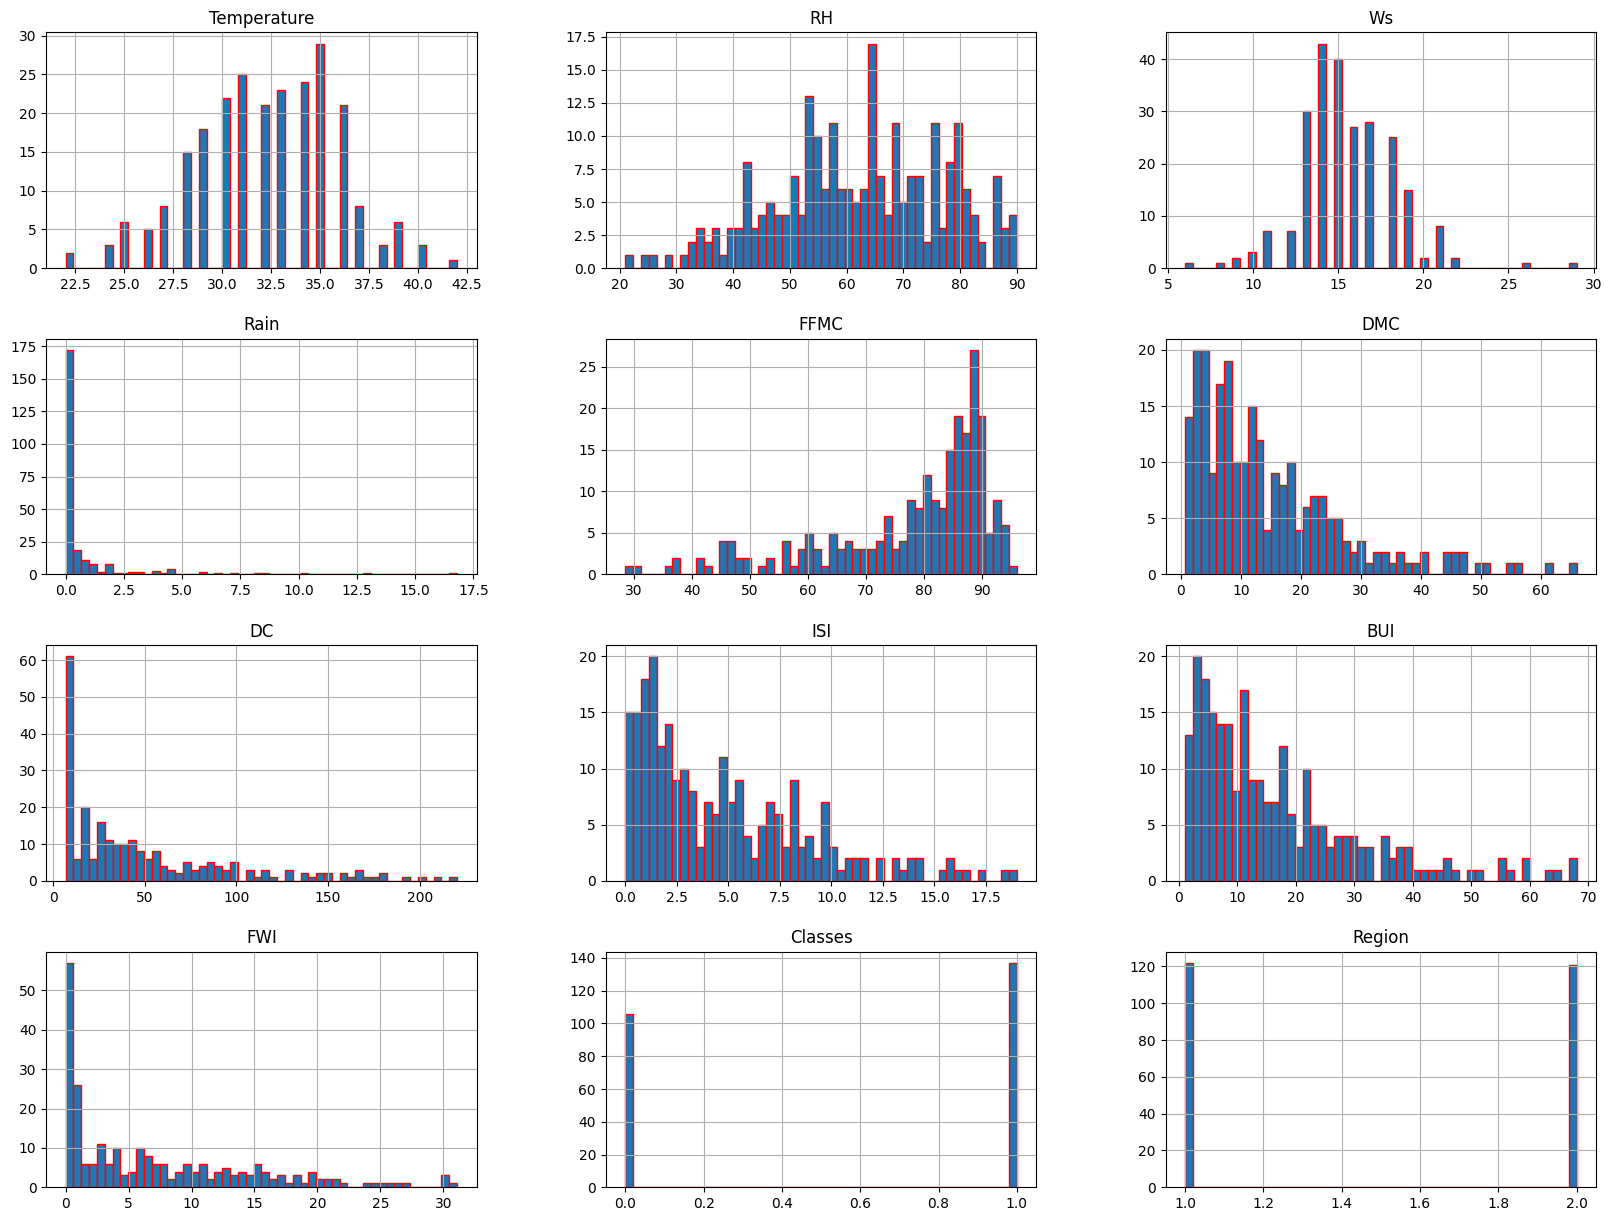

In [37]:
# Plot density plot for all features

#plt.style.use('seaborn')
df1.hist(bins=50, figsize = (20,15), ec = 'r')
plt.show()

Piecharts

In [38]:
percentage = df.Classes.value_counts(normalize = True)*100
percentage

,proportion
Classes,
fire,56.378601
not fire,43.621399


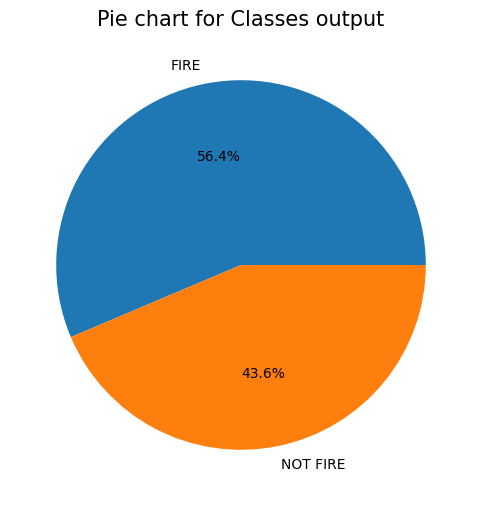

In [39]:
# Plotting Piechart

classlabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize = (12,6))
plt.pie(percentage, labels = classlabels, autopct = '%1.1f%%')
plt.title("Pie chart for Classes output", fontsize = 15)
plt.show()

# Checking multi collinearity

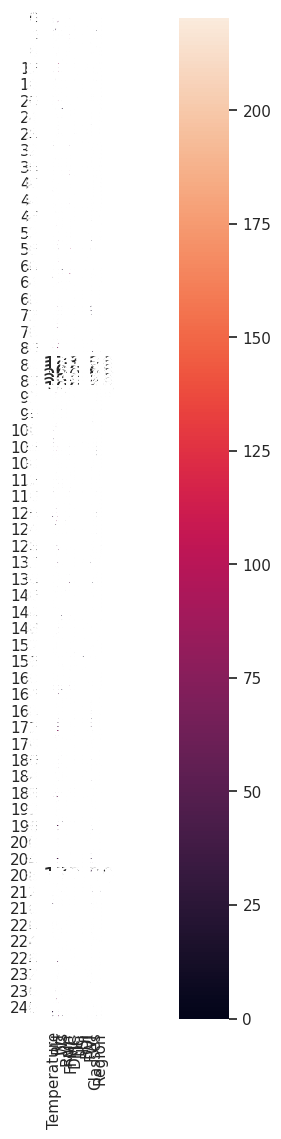

In [42]:
# Correlation chart

k = len(df1.columns)
# cols = corr.nlargest(k, 'Classes')['Classes'].index
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize = (20,13))

hm = sns.heatmap(df1, annot = True, square= True, fmt='.2f', annot_kws ={'size':15})
plt.show()


<Axes: >

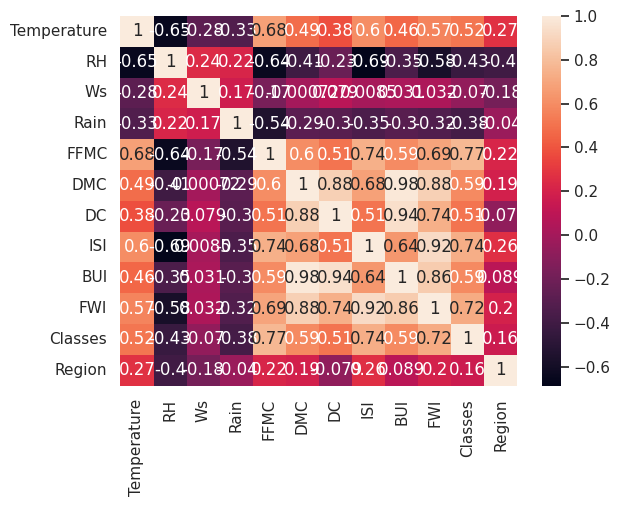

In [44]:
sns.heatmap(df1.corr(), annot= True)

# Canadian Forest Fire Weather Index (FWI) System

This column can be considered for Regression problem

<Axes: ylabel='FWI'>

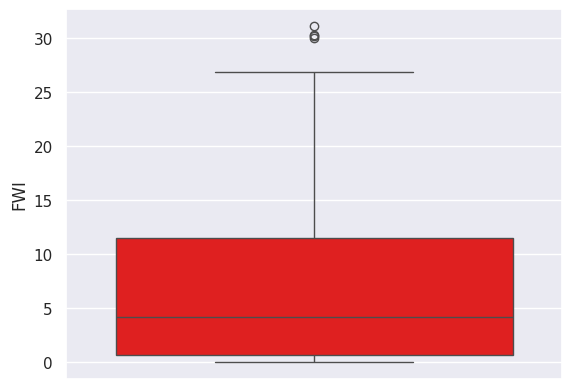

In [47]:
# Boxplot
sns.boxplot(df['FWI'], color = 'red')

# Monthwise Fire Analysis

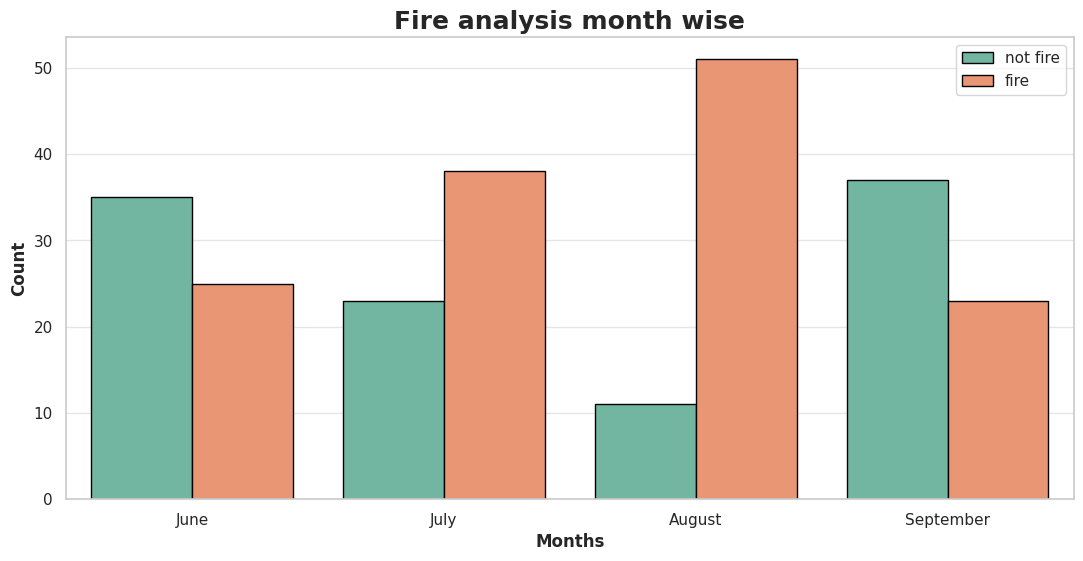

In [50]:
plt.subplots(figsize =(13,6))
sns.set_style('whitegrid')

sns.countplot(x='month', hue='Classes', data= df, ec= 'black', palette= 'Set2')
plt.title('Fire analysis month wise', fontsize = 18, weight ='bold')

plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight = 'bold')

plt.legend(loc = 'upper right')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.grid(alpha = 0.5, axis ='y')
plt.show()

INSIGHTS:

1. Most fires occured on August month.

2. Most fires occured in three months, i.e. June, July and August.

3. Less fires on September.

# EDA on all features:

In [51]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [52]:
def barchart(feature, xlabel):
  plt.figure(figsize=[14,7])
  by_feature = df1.groupby([feature], as_index = False)['Classes'].sum()
  ax = sns.barplot(x=feature, y='Classes', data= by_feature[[feature, 'Classes']], estimator = sum)
  ax.set(xlabel=xlabel, ylabel= 'Fire Count')

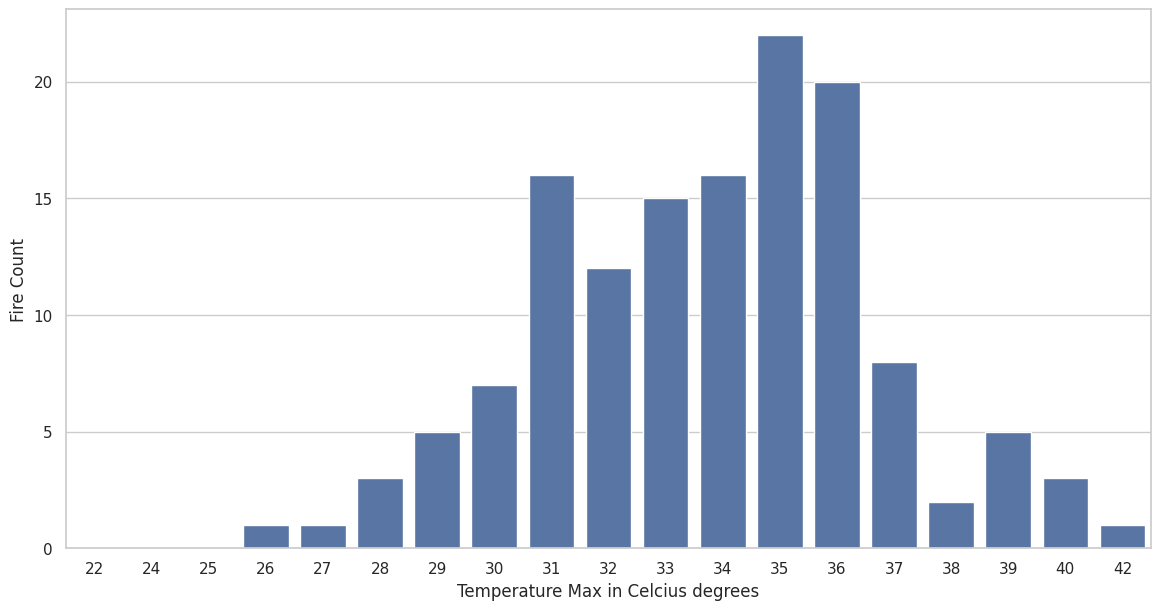

In [53]:
barchart('Temperature', 'Temperature Max in Celcius degrees')

INSIGHTS:

1. Max forest fires occured at temperature between 34 - 36 degrees.

2. Minimum no.of fires occured at 24 - 25 degrees.

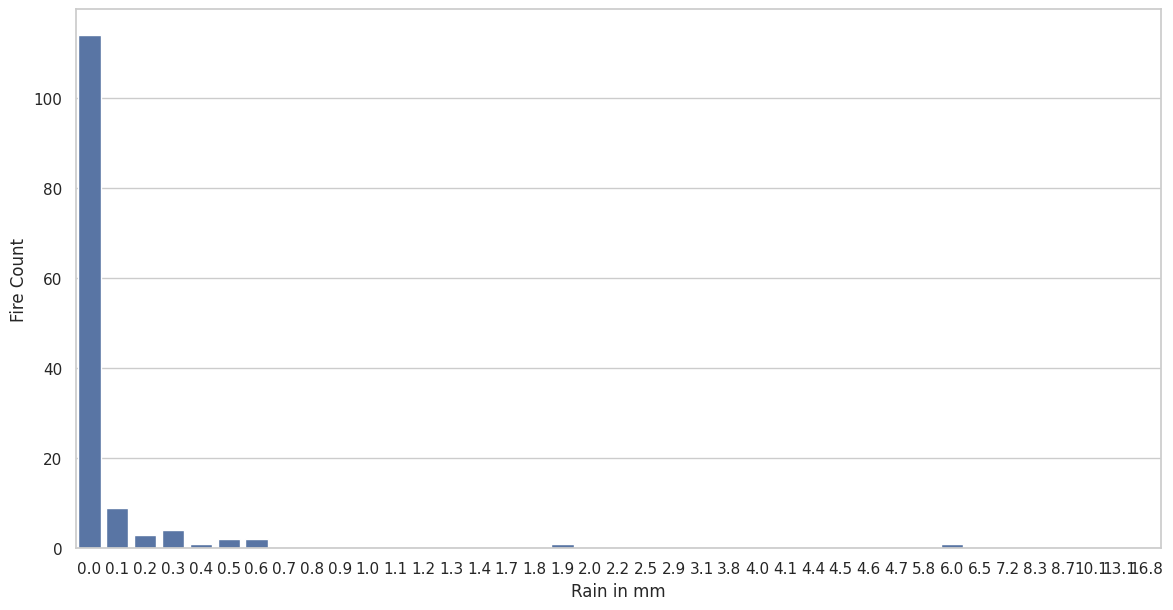

In [54]:
barchart('Rain', 'Rain in mm')

INSIGHTS:

1. Maximum fires occured at no rain case.

2. Minimum fires occured at 0.5-0.6 degrees.

# Fine Fuel Moisture Code(FFMC) index

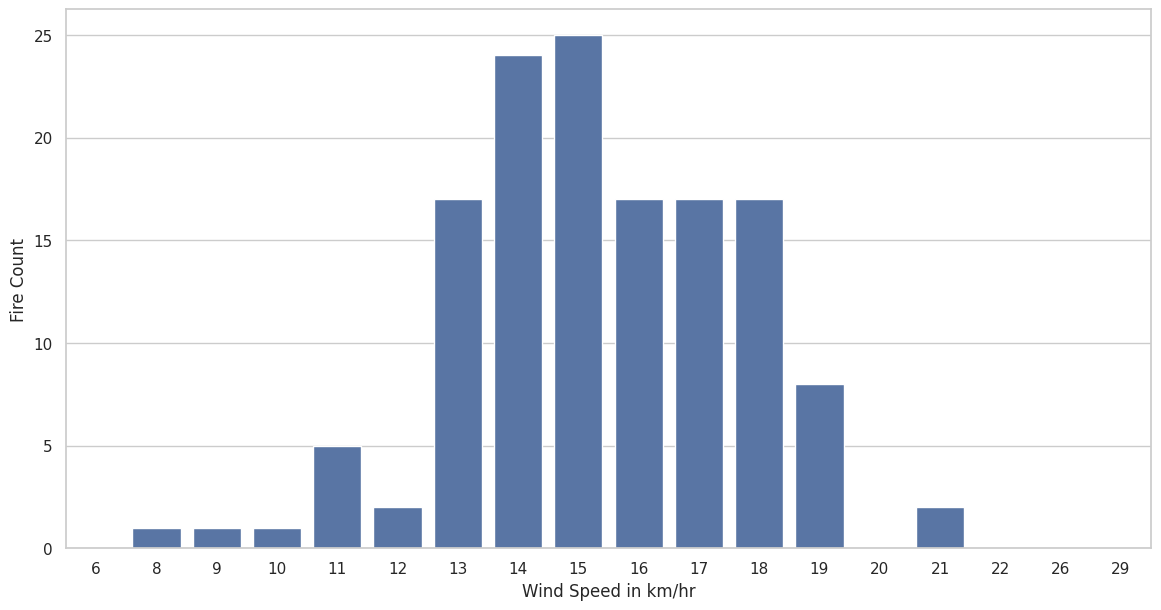

In [55]:
barchart('Ws', 'Wind Speed in km/hr')

INSIGHTS:

1. Maximum fire occured at wind speed 14-15 km/hr.

2. Minimum fire occured at wind speed 8-10 km/hr.

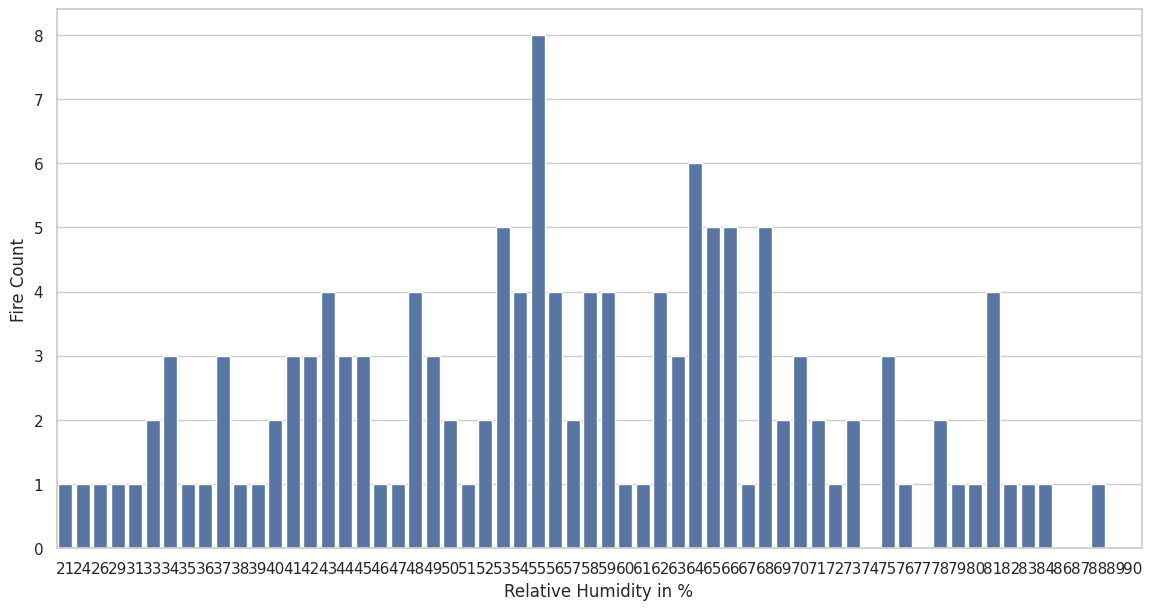

In [57]:
barchart('RH','Relative Humidity in %')

INSIGHTS:

1. Maximum fire occured at 55 % Relative Humidity.

2. Minimum fire count at 21-14 % Relative Humidity (RH).

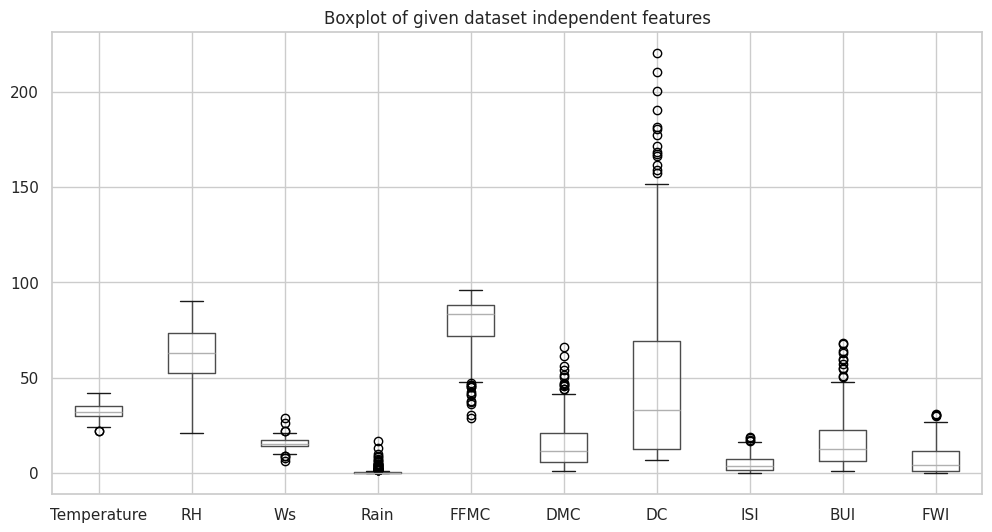

In [59]:
df_temp = df1.drop(['Classes', 'Region'], axis = 1)
fig = plt.figure(figsize = (12,6))
ax = df_temp.boxplot()
ax.set_title("Boxplot of given dataset independent features")
plt.show()

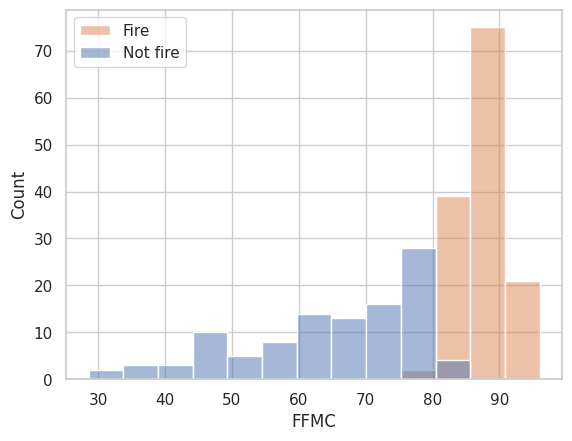

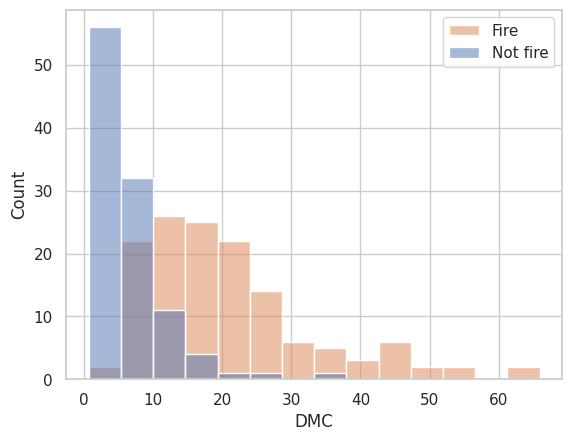

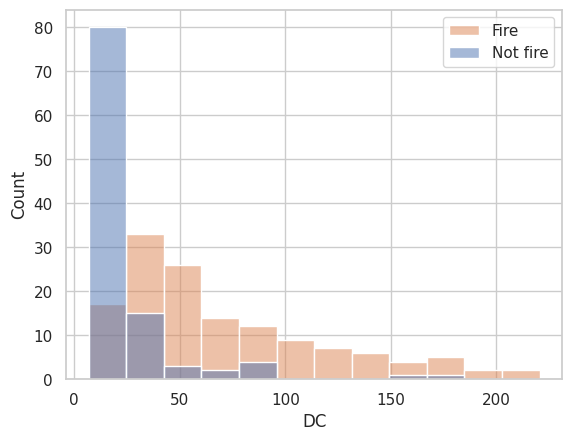

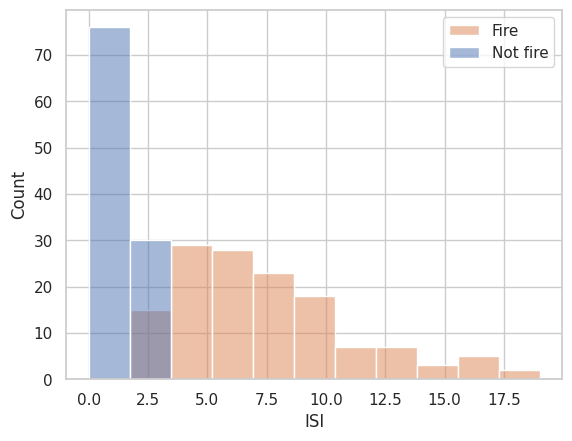

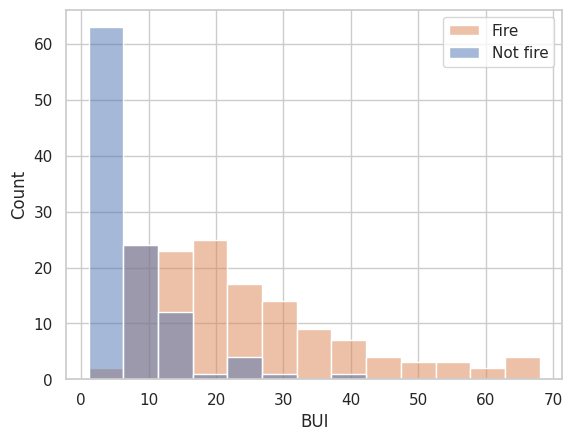

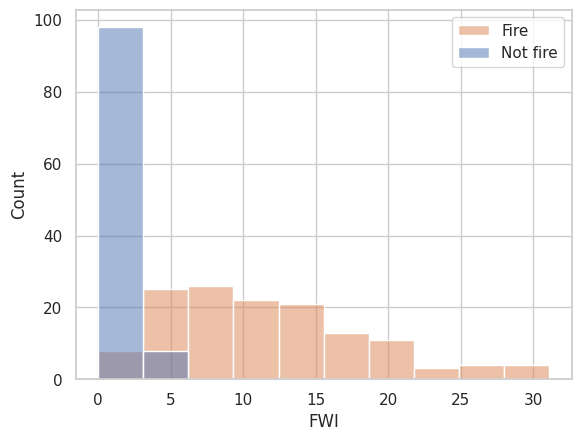

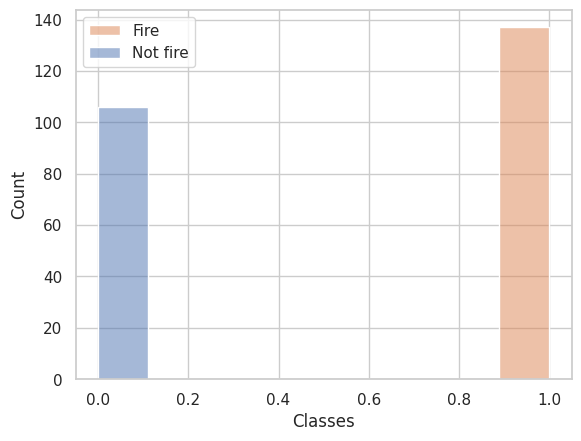

In [61]:
df_temp = df1.drop(['Region', 'Temperature', 'Rain', 'Ws', 'RH'], axis = 1)

for feature in df_temp:
  sns.histplot(data= df_temp, x= feature, hue = 'Classes')
  plt.legend(labels=['Fire', 'Not fire'])
  plt.show()

# FWI System Components Report

*FWI (Canadian Forest Fire Weather Index)*

**FFMC (Fine Fuel Moisture Code)**

1. Ranges between 28 - 96.

2. Lower chance of fire is when less FFMC less than 75.

3. Higher chance of fire is between 75 - 95.

**DMC (Duff Moisture Code)**

1. Ranges between 1.1 - 66.

2. Low chance of fire is between 1.1 - 10.

3. High chance of fire is between 10 - 30.

**DC (Drought Code)**

1. Ranges between 7 - 260.

2. Low chances of fire is between 0 - 25.

3. High chances of fire is above 25.

**ISI(Initial Spread Index)**

1. Ranges between 0 - 19.

2. Low chance of fire is between 0 - 3.

3. High chance of fire is above 3.

**BUI (Buildup Index)**

1. Ranges between 1.1 - 68.

2. Low chance of fire is between 1.1 - 10.

3. High chance of fire is above 10.

**FWI (Fire Weather Index)**

1. Ranges between 0 - 32.

2. Low chance of fire is between 0 - 3.

3. High chance of fire is between 3 - 15.